  Tanggal_Transaksi               Nama_biaya  jumlah_Tambahpajak  VAT_Amount  \
0        2022-12-31     Biaya Pembayaran\n\n              -637.0        63.0   
1        2022-12-31          Omset Penjualan             35000.0         0.0   
2        2022-12-31                   Komisi              -237.0        23.0   
3        2022-12-31  Biaya Free Shipping Max             -1223.0       121.0   
4        2022-12-31     Biaya Pembayaran\n\n              -362.0        36.0   

   Status_Pelepasan_Dana Tanggal_Dilepas     Nomor_Pesanan        ID_Pesanan  \
0  Dilepas ke Saldo Toko     01 Jan 2023  1029606958882486  1029606958982486   
1  Dilepas ke Saldo Toko     01 Jan 2023  1029606958882486  1029606958982486   
2  Dilepas ke Saldo Toko     01 Jan 2023  1029606958882486  1029606958982486   
3  Dilepas ke Saldo Toko     01 Jan 2023  1029606958882486  1029606958982486   
4  Dilepas ke Saldo Toko     01 Jan 2023  1023147215521347  1023147215621347   

  SKU_Penjual Status_Pesanan  \
0     

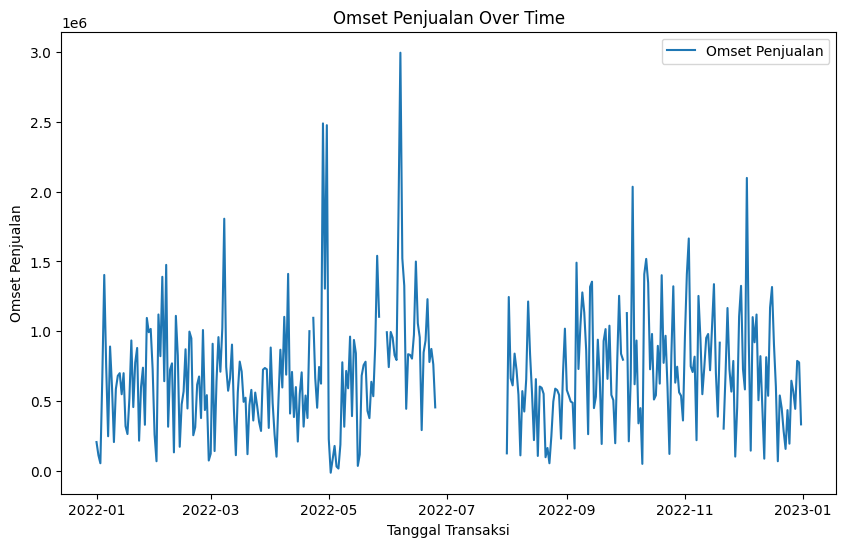

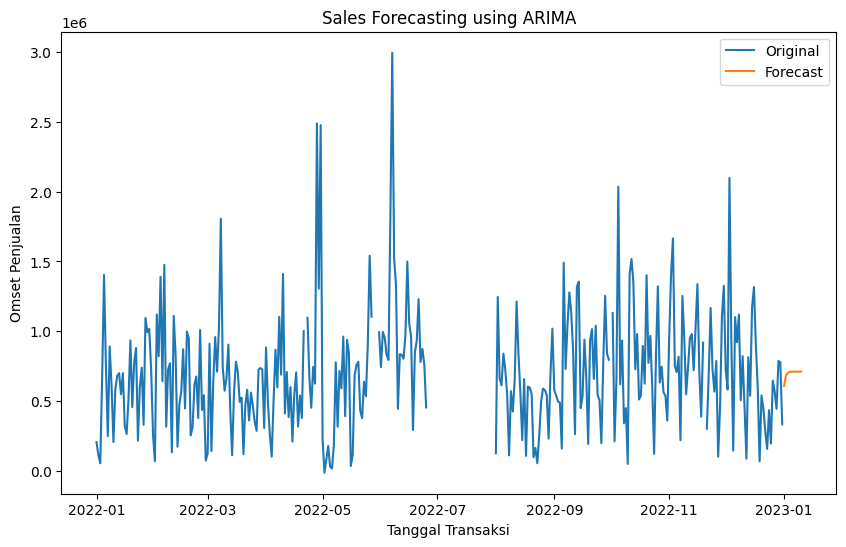

In [7]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'dataset.xlsx'  # Replace with your actual file path
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Display the first few rows of the dataset
print(data.head())

# Convert 'Tanggal_Transaksi' to datetime format
data['Tanggal_Transaksi'] = pd.to_datetime(data['Tanggal_Transaksi'], format='%Y-%m-%d')

# Aggregate 'jumlah_Tambahpajak' by date for ARIMA
sales_data = data[['Tanggal_Transaksi', 'jumlah_Tambahpajak']].groupby('Tanggal_Transaksi').sum()

# Set the frequency of the datetime index to daily (D), monthly (M), or another appropriate frequency
sales_data = sales_data.asfreq('D')  # Change 'D' to 'M' for monthly, 'W' for weekly, etc.

# Plot the aggregated sales data
plt.figure(figsize=(10, 6))
plt.plot(sales_data, label='Omset Penjualan')
plt.title('Omset Penjualan Over Time')
plt.xlabel('Tanggal Transaksi')
plt.ylabel('Omset Penjualan')
plt.legend()
plt.show()

# Fit ARIMA model
model = ARIMA(sales_data, order=(1, 1, 1))
model_fit = model.fit()

# Make forecast
forecast = model_fit.forecast(steps=10)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(sales_data, label='Original')
plt.plot(forecast, label='Forecast')
plt.title('Sales Forecasting using ARIMA')
plt.xlabel('Tanggal Transaksi')
plt.ylabel('Omset Penjualan')
plt.legend()
plt.show()
